In [33]:
import pandas as pd
import numpy as np

# 1. Archivos
## 1.1 Lee datos
Lee un Dataframe sin especificar el indice

In [17]:
casts = pd.read_csv('./data/cast.csv', index_col=None)
titles =pd.read_csv('./data/titles.csv', index_col =None)
casts.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [16]:
titles.tail()

,title,year
49995,Rebel,1970
49996,Suzanne,1996
49997,Bomba,2013
49998,Aao Jao Ghar Tumhara,1984
49999,Mrs. Munck,1995


In [4]:
casts.dtypes

title         object
year           int64
name          object
type          object
character     object
n            float64
dtype: object

Vemos que se crea un indice por defecto

In [5]:
casts.index

RangeIndex(start=0, stop=75001, step=1)

In [6]:
casts.columns

Index(['title', 'year', 'name', 'type', 'character', 'n'], dtype='object')

Por defecto cuando escribimos un DataFrame nos muestra las 5 primeras y 5 ultimas filas. Podemos cambiar este valor por defecto con `set_options`

In [19]:
titles

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011
...,...,...
49995,Rebel,1970
49996,Suzanne,1996
49997,Bomba,2013
49998,Aao Jao Ghar Tumhara,1984


In [22]:
pd.set_option('max_rows', 4, 'max_columns', 10)
titles

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
...,...,...
49998,Aao Jao Ghar Tumhara,1984
49999,Mrs. Munck,1995


Numero de filas de un Dataframe

In [23]:
len(titles)

50000

In [257]:
ex2=pd.read_csv('./data/ex2.csv', header=None)
ex2

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [258]:
ex2=pd.read_csv('./data/ex2.csv', names=['a', 'b', 'c', 'd', 'message'])
ex2

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [259]:
ex2=pd.read_csv('./data/ex2.csv', names=['a', 'b', 'c', 'd', 'message'], index_col='message')
ex2

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


## 1.2 Escribe datos

In [262]:
ex2.to_csv('d_out2.csv', header=False, index=False)

In [263]:
ex2.to_csv('d_out21.csv', header=True, index=False)

In [264]:
ex2.to_csv('d_out22.csv', header=True, index=True)

# 2. Operaciones
## 2.1 Selecciona elementos

Obtiene un Series con la columna title

In [25]:
t = titles['title']
type(t)

pandas.core.series.Series

In [26]:
t.head()

0             The Rising Son
1    The Thousand Plane Raid
              ...           
3                    Country
4                 Gaiking II
Name: title, Length: 5, dtype: object

Accede a un valor por posicion. Aqui accedemos a la cuarta posicion

In [28]:
titles.iloc[3]

title    Country
year        2000
Name: 3, dtype: object

In [30]:
titles.iloc[3:5]

,title,year
3,Country,2000
4,Gaiking II,2011


Podemos usar el indice para acceder a una posicion

In [32]:
titles.loc[3]

title    Country
year        2000
Name: 3, dtype: object

Creamos un indice. Ahora la cuarta fila se corresponde con el valor del indice 4:

In [39]:
titles.index=np.arange(len(titles))+1
titles.loc[4]

title    Country
year        2000
Name: 4, dtype: object

In [45]:
titles.iloc[2:5,:]

,title,year
3,Crucea de piatra,1993
4,Country,2000
5,Gaiking II,2011


In [44]:
titles.loc[2:5,:]

,title,year
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,Country,2000
5,Gaiking II,2011


Seleccionamos unas posiciones "sueltas"

In [46]:
titles.loc[[2,4,6],:]

,title,year
2,The Thousand Plane Raid,1969
4,Country,2000
6,Medusa (IV),2015


In [47]:
titles.iloc[[2,4,6],:]

,title,year
3,Crucea de piatra,1993
5,Gaiking II,2011
7,The Fresh Air Will Do You Good,2008


Podemos utilizar las columnas como hemos usado el indice. Es decir, podemos seleccionar una columna concreta, un rango de columnas, o una lista de columnas

In [48]:
titles.loc[[2,4,6],'title']

2    The Thousand Plane Raid
4                    Country
6                Medusa (IV)
Name: title, dtype: object

In [65]:
titles.iloc[[1,3,5],0]

2    The Thousand Plane Raid
4                    Country
6                Medusa (IV)
Name: title, dtype: object

In [49]:
titles.loc[[2,4,6],'title':'year']

,title,year
2,The Thousand Plane Raid,1969
4,Country,2000
6,Medusa (IV),2015


In [67]:
titles.iloc[[1,3,5],0:1]

,title
2,The Thousand Plane Raid
4,Country
6,Medusa (IV)


In [51]:
titles.loc[[2,4,6],['title','year']]

,title,year
2,The Thousand Plane Raid,1969
4,Country,2000
6,Medusa (IV),2015


In [68]:
titles.iloc[[1,3,5],[0,1]]

,title,year
2,The Thousand Plane Raid,1969
4,Country,2000
6,Medusa (IV),2015


Podemos hacer lo mismo con una Serie

In [42]:
t.iloc[3]

'Country'

In [43]:
t.loc[4:5]

4     Gaiking II
5    Medusa (IV)
Name: title, dtype: object

## 2.2 Selecciona una posicion

In [58]:
titles.at[3,'title']

'Crucea de piatra'

In [64]:
titles.iat[2,0]

'Crucea de piatra'

## 2.3 Filtra Datos

In [69]:
after85 = titles[titles['year'] > 1985]
after85.head()

,title,year
1,The Rising Son,1990
3,Crucea de piatra,1993
...,...,...
5,Gaiking II,2011
6,Medusa (IV),2015


Podemos usar and y or: 

In [70]:
t = titles
movies90 = t[ (t['year']>=1990) & (t['year']<2000) ]
movies90.head()

,title,year
1,The Rising Son,1990
3,Crucea de piatra,1993
...,...,...
20,Maa Durga Shakti,1999
25,Conflict of Interest,1993


## 2.4 Ordenar

In [72]:
macbeth = t[ t['title'] == 'Macbeth']
macbeth.head()

,title,year
4227,Macbeth,1913
9323,Macbeth,2006
...,...,...
17167,Macbeth,1997
25848,Macbeth,1998


Ordenamos por indice

In [73]:
macbeth = t[ t['title'] == 'Macbeth'].sort_index()
macbeth.head()

,title,year
4227,Macbeth,1913
9323,Macbeth,2006
...,...,...
17167,Macbeth,1997
25848,Macbeth,1998


Ordenamos por valor. En este caso por la serie `year`

In [75]:
macbeth = t[ t['title'] == 'Macbeth'].sort_values('year')
macbeth.head()

,title,year
4227,Macbeth,1913
17167,Macbeth,1997
...,...,...
9323,Macbeth,2006
11723,Macbeth,2013


## 2.5 Null Values

In [77]:
c = casts
c['n'].isnull().head()

0    False
1    False
     ...  
3     True
4     True
Name: n, Length: 5, dtype: bool

In [79]:
c.isnull().head()

,title,year,name,type,character,n
0,False,False,False,False,False,False
1,False,False,False,False,False,False
...,...,...,...,...,...,...
3,False,False,False,False,False,True
4,False,False,False,False,False,True


In [78]:
c['n'].notnull().head()

0     True
1     True
     ...  
3    False
4    False
Name: n, Length: 5, dtype: bool

In [80]:
c.notnull().head()

,title,year,name,type,character,n
0,True,True,True,True,True,True
1,True,True,True,True,True,True
...,...,...,...,...,...,...
3,True,True,True,True,True,False
4,True,True,True,True,True,False


In [81]:
c[c['n'].isnull()].head(3)

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [82]:
c[c['n'].notnull()].head(3)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0


In [83]:
c_fill = c[c['n'].isnull()].fillna('NA')
c_fill.head(2)

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NA
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NA


## 2.6 Operaciones con String

In [84]:
t[t['title'].str.startswith("Maa ")].head(3)

,title,year
20,Maa Durga Shakti,1999
3047,Maa Aur Mamta,1970
7471,Maa Vaibhav Laxmi,1989


## 2.7 Contar elementos

In [85]:
t['year'].value_counts().head()

2016    2363
2017    2138
        ... 
2014    1701
2013    1609
Name: year, Length: 5, dtype: int64

## 2.8 Graficas

In [89]:
import matplotlib.pyplot as plt

Mostramos los graficos inline

In [90]:
%matplotlib inline

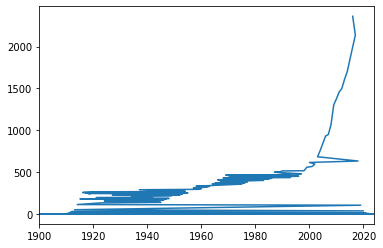

In [91]:
t = titles
p = t['year'].value_counts()
p.plot()
#plt.show()

Ordena por indice

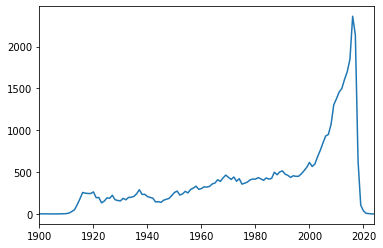

In [92]:
p.sort_index().plot()

## 2.9 Eliminar duplicados

In [289]:
dforiginal = pd.DataFrame({'k1':['one']*3 + ['two']*4,
... 'k2':[1,1,2,3,3,4,4]})
df=dforiginal.copy()
df

,k1,k2
0,one,1
1,one,1
...,...,...
5,two,4
6,two,4


In [290]:
df.duplicated()

0    False
1     True
     ...  
5    False
6     True
Length: 7, dtype: bool

In [291]:
df[df.duplicated()]

,k1,k2
1,one,1
4,two,3
6,two,4


Borra los duplicados, sobre el propio DataStream

In [292]:
df.drop_duplicates(inplace=True)
df.duplicated()
df

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


Borra los duplicados, pero eligiendo conservar la ultima instancia encontrada. Fijarse en los indices

In [293]:
df=dforiginal.copy()
df.drop_duplicates(keep="last",inplace=True)
df

,k1,k2
1,one,1
2,one,2
4,two,3
6,two,4


## 2.10 Buscar y reemplazar

In [294]:
df=dforiginal.copy()
df

,k1,k2
0,one,1
1,one,1
...,...,...
5,two,4
6,two,4


In [296]:
df.replace('one', 'One',inplace=True)
df

,k1,k2
0,One,1
1,One,1
...,...,...
5,two,4
6,two,4


Reemplaza varios a la vez

In [298]:
df.replace({'two':'Two', 1:10},inplace=True)
df

,k1,k2
0,One,10
1,One,10
...,...,...
5,Two,4
6,Two,4


# 3. Group By

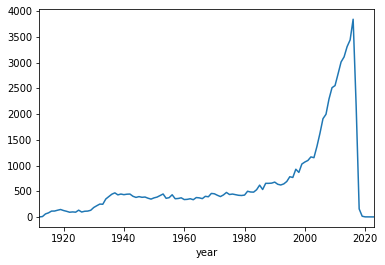

In [94]:
cg = c.groupby(['year']).size()
cg.plot()

In [95]:
c = casts
cf = c[c['name'] == 'Aaron Abrams']
cf.groupby(['year']).size().head()

year
2003    2
2004    2
       ..
2006    1
2007    2
Length: 5, dtype: int64

Hace un group by usando mas de una columna

In [96]:
cf.groupby(['year', 'title']).size().head()

year  title                               
2003  The In-Laws                             1
      The Visual Bible: The Gospel of John    1
                                             ..
2004  Siblings                                1
2005  Cinderella Man                          1
Length: 5, dtype: int64

In [97]:
c.groupby(['year']).n.max().head()

year
1912     6.0
1913    14.0
        ... 
1915    14.0
1916    35.0
Name: n, Length: 5, dtype: float64

In [98]:
c.groupby(['year']).n.min().head()

year
1912    6.0
1913    1.0
       ... 
1915    1.0
1916    1.0
Name: n, Length: 5, dtype: float64

In [99]:
c.groupby(['year']).n.mean().head()

year
1912    6.000000
1913    4.142857
          ...   
1915    4.236111
1916    5.037736
Name: n, Length: 5, dtype: float64

Tambien podemos hacer un group by por un campo __custom__:

In [101]:
decade = c['year']//10*10
c_dec = c.groupby(decade).n.size()
c_dec.head()

year
1910     669
1920    1121
        ... 
1940    3997
1950    3892
Name: n, Length: 5, dtype: int64

In [321]:
c

,year,name,type,character,n
title,,,,,
#1 Serial Killer,2013,Michael Alton,actor,Detective Roberts,17.0
#DigitalLivesMatter,2016,Rashan Ali,actress,News Reporter,NaN
...,...,...,...,...,...
xXx: Return of Xander Cage,2017,Wayne Ambrose,actor,Choir Members,34.0
xXx: State of the Union,2005,Robert Alonzo,actor,Guard,NaN


In [309]:
cg1=c['name'].groupby(c['year'])
cg1

In [325]:
for ano,nombre in cg1:
    print(ano)
    print(nombre)

1912
title
From the Manger to the Cross; or, Jesus of Nazareth    James D. Ainsley
Karnevalsnattens Gaade                                       Gyda Aller
Satana                                                       Rina Albry
Name: name, dtype: object
1913
title
Ballettens Datter              Svend Aggerholm
Die Augen des Ole Brandis           Emil Albes
                                    ...       
Prinsesse Elena                Svend Aggerholm
The Girl of the Sunny South          Sol Alkin
Name: name, Length: 10, dtype: object
1914
title
After the Ball                 Nina (II) Allen
After the Ball                      G.H. Adams
                                  ...         
Where the Trail Divides        Constance Adams
Zigo                       Hakon Ahnfelt-R?nne
Name: name, Length: 61, dtype: object
1915
title
'Twas Ever Thus            Art Acord
1914                     Gerald Ames
                           ...      
Whoso Diggeth a Pit      Gerald Ames
Young Romance       

In [322]:
cg2=c['name'].groupby([c['type'],c['year']])

In [326]:
for (tipo,ano),nombre in cg2:
    print(ano)
    print(tipo)
    print(nombre)

1912
actor
title
From the Manger to the Cross; or, Jesus of Nazareth    James D. Ainsley
Name: name, dtype: object
1913
actor
title
Ballettens Datter              Svend Aggerholm
Die Augen des Ole Brandis           Emil Albes
                                    ...       
Prinsesse Elena                Svend Aggerholm
The Girl of the Sunny South          Sol Alkin
Name: name, Length: 9, dtype: object
1914
actor
title
After the Ball             G.H. Adams
Arbejdet adler          Enoch Aagaard
                         ...         
Uriel Acosta                 B. Adler
Zigo              Hakon Ahnfelt-R?nne
Name: name, Length: 38, dtype: object
1915
actor
title
'Twas Ever Thus               Art Acord
1914                        Gerald Ames
                             ...       
The White Sister       Sidney Ainsworth
Whoso Diggeth a Pit         Gerald Ames
Name: name, Length: 50, dtype: object
1916
actor
title
A Child of Mystery        Alfred Allen
A Soul Enslaved           Alfred Allen
 

title
...The Making of...     Noor (III) Ahmed
1 2 3                        Jared Adams
                             ...        
Zero Day               Serataren Adragna
Zurdo                       Daniel Acu?a
Name: name, Length: 768, dtype: object
2004
actor
title
06/05                         Dave Abspoel
107 Street              Roy (II) Alexandre
                               ...        
Zeyda and the Hitman          Danny Aiello
inter.m@tes                    Jojo Alejar
Name: name, Length: 848, dtype: object
2005
actor
title
'D'                             Ishrat Ali
...en fin, el mar             Ever Alvarez
                                ...       
Zwarte zwanen              Adewale Akwande
xXx: State of the Union      Robert Alonzo
Name: name, Length: 1042, dtype: object
2006
actor
title
'Wag kang lilingon     Marvin Agustin
'Wag kang lilingon    Archie Alemania
                           ...       
Zuzu Angel               S?rgio Abreu
Zwartboek                 Tomer Agami


# 4. Unstack

Hacemos el groupby por dos campos, uno de ellos custom

In [104]:
c = casts
c_decade = c.groupby( ['type', c['year']//10*10] ).size()
c_decade.head(8)

type   year
actor  1910     384
       1920     710
               ... 
       1970    3044
       1980    3565
Length: 8, dtype: int64

In [105]:
c_decade

type     year
actor    1910     384
         1920     710
                 ... 
actress  2010    8853
         2020       3
Length: 24, dtype: int64

__Bonito!__

In [106]:
c_decade.unstack()

year,1910,1920,1930,1940,1950,...,1980,1990,2000,2010,2020
type,,,,,,,,,,,
actor,384,710,2628,3014,2877,...,3565,5108,10368,15523,4
actress,285,411,820,983,1015,...,1989,2544,5831,8853,3


In [108]:
c_decade.unstack()

year,1910,1920,1930,1940,1950,...,1980,1990,2000,2010,2020
type,,,,,,,,,,,
actor,384,710,2628,3014,2877,...,3565,5108,10368,15523,4
actress,285,411,820,983,1015,...,1989,2544,5831,8853,3


Muestra un grafico de barras:

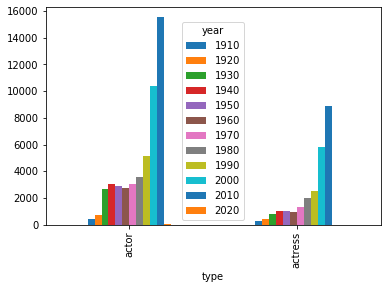

In [110]:
c_decade.unstack().plot(kind='bar')

Hacemos la transpuesta del Dataframe para representarlo

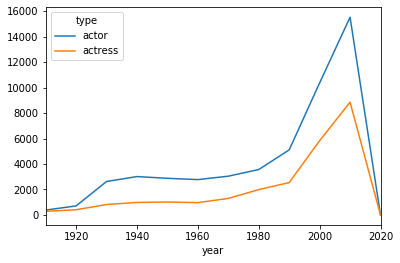

In [111]:
c_decade.unstack().T.plot()

Podemos especificar que variable desapilar. En nuestro dataframe tenemos type y actor

In [114]:
c_decade

type     year
actor    1910     384
         1920     710
                 ... 
actress  2010    8853
         2020       3
Length: 24, dtype: int64

Por defecto unstack() es equivalente a unstack(-1). En nuestro caso unstack(-1) es lo mismo que unstack(1)

In [115]:
c_decade.unstack(1)

year,1910,1920,1930,1940,1950,...,1980,1990,2000,2010,2020
type,,,,,,,,,,,
actor,384,710,2628,3014,2877,...,3565,5108,10368,15523,4
actress,285,411,820,983,1015,...,1989,2544,5831,8853,3


In [116]:
c_decade.unstack(0)

type,actor,actress
year,,
1910,384,285
1920,710,411
...,...,...
2010,15523,8853
2020,4,3


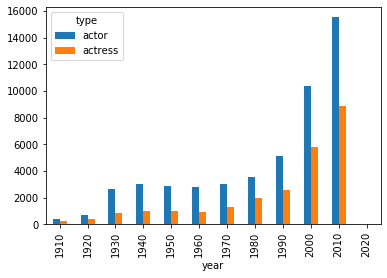

In [117]:
c_decade.unstack(0).plot(kind='bar')

# 5. Merge (joins)

In [120]:
release = pd.read_csv('./data/release_dates.csv', index_col=None)
release.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
...,...,...,...,...
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


In [121]:
casts.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
...,...,...,...,...,...,...
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [123]:
c_amelia = casts[ casts['title'] == 'Amelia']
c_amelia.head()

,title,year,name,type,character,n
5767,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0
23319,Amelia,2009,Jeremy Akerman,actor,Sheriff,19.0


In [124]:
release [ release['title'] == 'Amelia' ].head()

,title,year,country,date
20543,Amelia,1966,Mexico,1966-03-10
20544,Amelia,2009,Canada,2009-10-23
...,...,...,...,...
20546,Amelia,2009,Australia,2009-11-12
20547,Amelia,2009,Singapore,2009-11-12


Hace el merge de los dos DataFrame usando los campos que son comunes en ambos:

In [125]:
c_amelia.merge(release).head()

,title,year,name,type,character,n,country,date
0,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Canada,2009-10-23
1,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,USA,2009-10-23
...,...,...,...,...,...,...,...,...
3,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Singapore,2009-11-12
4,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Ireland,2009-11-13


## 5.1 Merge consigo mismo

In [129]:
c = casts[ casts['name']=='Aaron Abrams' ]
c.head(2)

,title,year,name,type,character,n
5765,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN
5766,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0


In [127]:
c.merge(casts, on=['title', 'year']).head()

,title,year,name_x,type_x,character_x,n_x,name_y,type_y,character_y,n_y
0,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN,Aaron Abrams,actor,Ralph Sinclair,NaN
1,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN,Christian Ackerman,actor,Simon,NaN
...,...,...,...,...,...,...,...,...,...,...
3,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0,Aaron Abrams,actor,Alex,4.0
4,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Aaron Abrams,actor,Slim Gordon,8.0


## 5.2 Avanzado

In [266]:
df1 = pd.DataFrame({ 'key' : ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
... 'data1' : range(7)})
df1

,key,data1
0,b,0
1,b,1
...,...,...
5,a,5
6,b,6


In [267]:
df2 = pd.DataFrame({ 'key' : ['a', 'b', 'd'],
... 'data2' : range(3)})
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [269]:
df3 = pd.DataFrame({ 'key1' : ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
... 'data1' : range(7)})
df3

,key1,data1
0,b,0
1,b,1
...,...,...
5,a,5
6,b,6


In [271]:
df4 = pd.DataFrame({ 'key2' : ['a', 'b', 'd', 'b'],
... 'data1' : range(4)})
df4

,key2,data1
0,a,0
1,b,1
2,d,2
3,b,3


### 5.2.1 Many to One

Utiliza los campos que son comunes en ambos DataFrames para hacer el join:

In [268]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
...,...,...,...
4,a,4,0
5,a,5,0


Estos dos dataframes no tienen ningun campo comun. Tenemos que especificar al har el join que camnpos se deben utilizar

In [273]:
pd.merge(df3, df4, left_on='key1', right_on='key2')

,key1,data1_x,key2,data1_y
0,b,0,b,1
1,b,0,b,3
...,...,...,...,...
7,a,4,a,0
8,a,5,a,0


### 5.2.2 Inner and outer join

Un __left join__:

In [274]:
pd.merge(df3, df4, left_on='key1', right_on='key2', how="left")

,key1,data1_x,key2,data1_y
0,b,0,b,1.0
1,b,0,b,3.0
...,...,...,...,...
8,b,6,b,1.0
9,b,6,b,3.0


Un __right__ join: 

In [275]:
pd.merge(df3, df4, left_on='key1', right_on='key2', how="right")

,key1,data1_x,key2,data1_y
0,b,0.0,b,1
1,b,1.0,b,1
...,...,...,...,...
8,a,5.0,a,0
9,NaN,NaN,d,2


Un __outer__ join: 

In [276]:
pd.merge(df3, df4, left_on='key1', right_on='key2', how="outer")

,key1,data1_x,key2,data1_y
0,b,0.0,b,1.0
1,b,0.0,b,3.0
...,...,...,...,...
9,c,3.0,NaN,NaN
10,NaN,NaN,d,2.0


# 6. Indices

Medimos el tiempo que se necesita para hacer ciertas operaciones con y sin indice

Usamos la magic function __%%time__

In [137]:
interpretes=pd.read_csv('./data/cast.csv', index_col=None)

In [138]:
%%time

interpretes[interpretes['title']=='Macbeth']

Wall time: 10.8 ms


,title,year,name,type,character,n
12868,Macbeth,2015,Darren Adamson,actor,Soldier,NaN
22302,Macbeth,1916,Spottiswoode Aitken,actor,Duncan,4.0
...,...,...,...,...,...,...
60543,Macbeth,2014,Moyo Akand?,actress,Witch,NaN
63776,Macbeth,1916,Mary Alden,actress,Lady Macduff,6.0


Usamos la magic function __%%timeit__. Es mas precisa que %%time

In [140]:
%%timeit

interpretes[interpretes['title']=='Macbeth']

11.7 ms ± 378 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Fijamos una de las columnas como indice. Al hacerlo podremos buscar usando el indice. Notese que la Serie usada ya no figura en la relacion de columnas

In [151]:
c = interpretes.set_index('title')
c.head()

,year,name,type,character,n
title,,,,,
#1 Serial Killer,2013,Michael Alton,actor,Detective Roberts,17.0
#DigitalLivesMatter,2016,Rashan Ali,actress,News Reporter,NaN
...,...,...,...,...,...
#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN
#Horror,2015,Emma Adler,actress,Georgie,1.0


In [145]:
c.columns

Index(['year', 'name', 'type', 'character', 'n'], dtype='object')

In [146]:
%%time

c.loc['Macbeth']

Wall time: 23.7 ms


,year,name,type,character,n
title,,,,,
Macbeth,2015,Darren Adamson,actor,Soldier,NaN
Macbeth,1916,Spottiswoode Aitken,actor,Duncan,4.0
...,...,...,...,...,...
Macbeth,2014,Moyo Akand?,actress,Witch,NaN
Macbeth,1916,Mary Alden,actress,Lady Macduff,6.0


In [153]:
%%timeit

c.loc['Macbeth']

371 µs ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Conclusion: __es mucho mas rápido__  
  
Vamos a ordenar el indice. Veamos cual es el resultado de la busqueda una vez hemos ordenado el indice

In [154]:
c = interpretes.set_index('title').sort_index()

In [155]:
%%time

c.loc['Macbeth']

Wall time: 19.6 ms


,year,name,type,character,n
title,,,,,
Macbeth,1948,William Alland,actor,Second Murderer,18.0
Macbeth,1916,Spottiswoode Aitken,actor,Duncan,4.0
...,...,...,...,...,...
Macbeth,2014,Moyo Akand?,actress,Witch,NaN
Macbeth,2015,Darren Adamson,actor,Soldier,NaN


In [156]:
%%timeit

c.loc['Macbeth']

376 µs ± 16.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Conclusion: el indice __ordenado__ es __extremadamente mas rápido__

## 6.1 Más de un indice

In [234]:
cm = interpretes.set_index(['title', 'n']).sort_index()
cm.head(2)

,,year,name,type,character
title,n,,,,
#1 Serial Killer,17.0,2013,Michael Alton,actor,Detective Roberts
#DigitalLivesMatter,NaN,2016,Rashan Ali,actress,News Reporter


In [235]:
cm.index

MultiIndex([(          '#1 Serial Killer', 17.0),
            (       '#DigitalLivesMatter',  nan),
            (             '#FromJennifer',  nan),
            (             '#FromJennifer',  nan),
            (                   '#Horror',  1.0),
            (             '#Lucky Number', 31.0),
            (        '#Nerealnaya lyubov',  nan),
            (              '#REALITYHIGH',  nan),
            (                     '#Roxy',  nan),
            (                    '#Stuck', 18.0),
            ...
            (                      'iBoy',  9.0),
            (               'inter.m@tes',  6.0),
            (           'kingdom of ants',  nan),
            (           'kingdom of ants',  nan),
            (  'les aventures d'archives',  nan),
            (                 'w Delta z',  8.0),
            ('xXx: Return of Xander Cage', 34.0),
            ('xXx: Return of Xander Cage', 64.0),
            ('xXx: Return of Xander Cage', 84.0),
            (   'xXx: State of the

Si ahora buscamos por uno de los dos indices, notese que el DataFrame resultante sigue teniendo un indice:

In [236]:
cm.loc['Macbeth']

,year,name,type,character
n,,,,
4.0,1916,Spottiswoode Aitken,actor,Duncan
6.0,1916,Mary Alden,actress,Lady Macduff
...,...,...,...,...
NaN,2016,John Albasiny,actor,Doctor
NaN,2014,Moyo Akand?,actress,Witch


Podemos ahora hacer una busqueda __usando los dos__ indices:

In [249]:
cm.loc['Macbeth'].loc[4]

year                        1916
name         Spottiswoode Aitken
type                       actor
character                 Duncan
Name: 4.0, dtype: object

In [250]:
cm.loc['Macbeth',6]

C:\Users\Eugenio\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


,,year,name,type,character
title,n,,,,
Macbeth,6.0,1916,Mary Alden,actress,Lady Macduff


## 6.2 Eliminar un indice

In [165]:
cm = cm.reset_index('n')
cm.index

Index(['#1 Serial Killer', '#DigitalLivesMatter', '#FromJennifer',
       '#FromJennifer', '#Horror', '#Lucky Number', '#Nerealnaya lyubov',
       '#REALITYHIGH', '#Roxy', '#Stuck',
       ...
       'iBoy', 'inter.m@tes', 'kingdom of ants', 'kingdom of ants',
       'les aventures d'archives', 'w Delta z', 'xXx: Return of Xander Cage',
       'xXx: Return of Xander Cage', 'xXx: Return of Xander Cage',
       'xXx: State of the Union'],
      dtype='object', name='title', length=75001)

Una vez hemos eliminado el indice, la Serie vuelve a su sitio. Fijemo nos en la columna `n`:

In [166]:
cm.columns

Index(['n', 'year', 'name', 'type', 'character'], dtype='object')

In [167]:
cm = cm.reset_index('title')
cm.index

RangeIndex(start=0, stop=75001, step=1)

In [168]:
cm.columns

Index(['title', 'n', 'year', 'name', 'type', 'character'], dtype='object')

In [169]:
cm

,title,n,year,name,type,character
0,#1 Serial Killer,17.0,2013,Michael Alton,actor,Detective Roberts
1,#DigitalLivesMatter,NaN,2016,Rashan Ali,actress,News Reporter
...,...,...,...,...,...,...
74999,xXx: Return of Xander Cage,84.0,2017,Julie Abcede,actor,Catwalk Partiers
75000,xXx: State of the Union,NaN,2005,Robert Alonzo,actor,Guard


## 6.3 Finalmente  
Podemos crear una Serie o un DataStream a partir de una lista con datos, pero tambien podemos especificar una lista con los valores del indice

In [226]:
data = pd.Series([10, 20, 30, 40, 15, 25, 35, 25], index = ['a', 'a',
... 'a', 'a', 'b', 'b', 'b', 'b'])
data.head()

a    10
a    20
     ..
a    40
b    15
Length: 5, dtype: int64

Podriamos crea el indece multi-indice, si pasasemos dos listas:

In [227]:
data = pd.Series([10, 20, 30, 40, 15, 25, 35, 25], index = [['a', 'a',
... 'a', 'a', 'b', 'b', 'b', 'b'], ['obj1', 'obj2', 'obj3', 'obj4', 'obj1',
... 'obj2', 'obj3', 'obj4']])
data.head()

a  obj1    10
   obj2    20
           ..
   obj4    40
b  obj1    15
Length: 5, dtype: int64

Podriamos especificar el nombre de los indices si pasasemos un diccionario:

# 7. Numpy

## 7.1 Matrices  
Matriz de Rango 1

In [170]:
import numpy as np

In [171]:
d = np.array([1, 2, 3])
type(d)

numpy.ndarray

In [172]:
d

array([1, 2, 3])

In [176]:
d.shape

(3,)

Matriz de rango 2

In [174]:
nd = np.array([[1, 2, 3], [3, 4, 5], [10, 11, 12]])
type(nd)

numpy.ndarray

In [175]:
nd.shape

(3, 3)

In [185]:
nd.dtype

dtype('int32')

In [177]:
np.zeros(3)

array([0., 0., 0.])

In [181]:
np.ones(3)

array([1., 1., 1.])

In [187]:
uno=np.ones((3,3))

In [182]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [190]:
e2=uno+4
e2

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

Crea una matriz con unos con la misma shape que e2

In [191]:
np.ones_like(e2)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

Convierte una lista en matriz

In [194]:
a = ['1', '2', '3']
a

['1', '2', '3']

In [197]:
a_arr = np.array(a, dtype=np.string_)
a_arr

array([b'1', b'2', b'3'], dtype='|S1')

## 7.2 Boolean indexing

In [199]:
data = np.random.randn(5, 3)
data.shape

(5, 3)

In [200]:
name = np.array(['a', 'b', 'c', 'a', 'b'])

Retorna una matriz booleana con el resultado de la comparacion:

In [201]:
name=='a'

array([ True, False, False,  True, False])

Este vector booleano lo podemos pasar como argumento de modo que aquellas filas que sean true seran recuperadas 

In [202]:
data

array([[-0.84606815,  0.68303438,  1.02399111],
       [ 1.05637751, -0.39539286,  0.42956646],
       [ 0.27515014, -0.18804705, -1.2136559 ],
       [-1.56145951, -0.91844565,  0.0812462 ],
       [ 2.31562554,  0.53892769, -1.56776391]])

__Excelente!!!__. Podemos recuperar las filas que nos interese de nuestra matriz

In [203]:
data[name=='a']

array([[-0.84606815,  0.68303438,  1.02399111],
       [-1.56145951, -0.91844565,  0.0812462 ]])

In [204]:
data[name != 'a']

array([[ 1.05637751, -0.39539286,  0.42956646],
       [ 0.27515014, -0.18804705, -1.2136559 ],
       [ 2.31562554,  0.53892769, -1.56776391]])

In [205]:
data[(name == 'b') | (name=='c')]

array([[ 1.05637751, -0.39539286,  0.42956646],
       [ 0.27515014, -0.18804705, -1.2136559 ],
       [ 2.31562554,  0.53892769, -1.56776391]])

Si le pasamos __una matriz booleana__ con la misma dimension que la propia matriz, aplica una especie de __mascara__, retornando aquellas celdas en las que el valor sea true

In [208]:
data[ (data > 1) & (data < 2) ]

array([1.02399111, 1.05637751])

## 7.3 Reshape

In [210]:
a = np.arange(0, 20)
a.shape

(20,)

In [211]:
a45 = a.reshape(4, 5)
a45

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

Recupera ciertas filas de la matriz

In [212]:
b = a45[ [2, 0, 1] ]
b

array([[10, 11, 12, 13, 14],
       [ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9]])

Traspuesta

In [213]:
b.T

array([[10,  0,  5],
       [11,  1,  6],
       [12,  2,  7],
       [13,  3,  8],
       [14,  4,  9]])

## 7.4 Concatenating

Para muestras de la normal N(mu, sigma^2), usar:

sigma * np.random.randn(...) + mu

In [219]:
arr = np.arange(12).reshape(3,4)
rn = np.random.randn(3, 4)
rn.shape

(3, 4)

In [221]:
np.concatenate([arr, rn]).shape

(6, 4)

In [222]:
np.concatenate([arr, rn], axis=1).shape

(3, 8)

# 8. Time Series

In [327]:
rng = pd.date_range('2011-03-01 10:15', periods = 10, freq = 'M')
rng

DatetimeIndex(['2011-03-31 10:15:00', '2011-04-30 10:15:00',
               '2011-05-31 10:15:00', '2011-06-30 10:15:00',
               '2011-07-31 10:15:00', '2011-08-31 10:15:00',
               '2011-09-30 10:15:00', '2011-10-31 10:15:00',
               '2011-11-30 10:15:00', '2011-12-31 10:15:00'],
              dtype='datetime64[ns]', freq='M')

In [328]:
rng = pd.date_range('2015 Jul 2 10:15', periods = 10, freq = 'M')
rng

DatetimeIndex(['2015-07-31 10:15:00', '2015-08-31 10:15:00',
               '2015-09-30 10:15:00', '2015-10-31 10:15:00',
               '2015-11-30 10:15:00', '2015-12-31 10:15:00',
               '2016-01-31 10:15:00', '2016-02-29 10:15:00',
               '2016-03-31 10:15:00', '2016-04-30 10:15:00'],
              dtype='datetime64[ns]', freq='M')

In [329]:
rng = pd.date_range(start = '2015 Jul 2 10:15', end = '2015 July 12', freq = '12H')
rng

DatetimeIndex(['2015-07-02 10:15:00', '2015-07-02 22:15:00',
               '2015-07-03 10:15:00', '2015-07-03 22:15:00',
               '2015-07-04 10:15:00', '2015-07-04 22:15:00',
               '2015-07-05 10:15:00', '2015-07-05 22:15:00',
               '2015-07-06 10:15:00', '2015-07-06 22:15:00',
               '2015-07-07 10:15:00', '2015-07-07 22:15:00',
               '2015-07-08 10:15:00', '2015-07-08 22:15:00',
               '2015-07-09 10:15:00', '2015-07-09 22:15:00',
               '2015-07-10 10:15:00', '2015-07-10 22:15:00',
               '2015-07-11 10:15:00', '2015-07-11 22:15:00'],
              dtype='datetime64[ns]', freq='12H')

In [331]:
rng = pd.date_range(start = '2015 Jul 2 10:15', end = '2015 July 12', freq = '12H', tz='Asia/Kolkata')
rng

DatetimeIndex(['2015-07-02 10:15:00+05:30', '2015-07-02 22:15:00+05:30',
               '2015-07-03 10:15:00+05:30', '2015-07-03 22:15:00+05:30',
               '2015-07-04 10:15:00+05:30', '2015-07-04 22:15:00+05:30',
               '2015-07-05 10:15:00+05:30', '2015-07-05 22:15:00+05:30',
               '2015-07-06 10:15:00+05:30', '2015-07-06 22:15:00+05:30',
               '2015-07-07 10:15:00+05:30', '2015-07-07 22:15:00+05:30',
               '2015-07-08 10:15:00+05:30', '2015-07-08 22:15:00+05:30',
               '2015-07-09 10:15:00+05:30', '2015-07-09 22:15:00+05:30',
               '2015-07-10 10:15:00+05:30', '2015-07-10 22:15:00+05:30',
               '2015-07-11 10:15:00+05:30', '2015-07-11 22:15:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', freq='12H')

In [332]:
type(rng[0])

pandas._libs.tslibs.timestamps.Timestamp

## 8.1 Convertir Strings a Fechas